# Chapter 11 In-chapter examples

In [1]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 11.1: Goals of the t-test

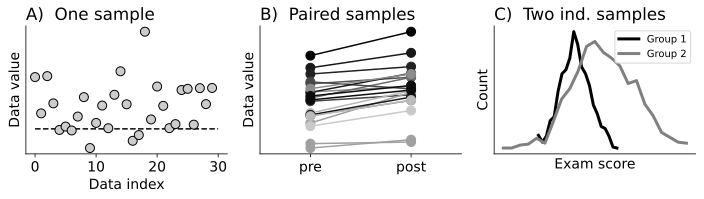

In [3]:
_,axs = plt.subplots(1,3,figsize=(10,3))

# panel A: one-sample t-test
data = np.random.normal(loc=.5,size=30)
axs[0].plot(data,'ko',markersize=9,markerfacecolor=(.8,.8,.8))
axs[0].plot([0,len(data)],[0,0],'k--',zorder=-10)
axs[0].set(xlabel='Data index',ylabel='Data value',yticks=[],
           title=r'A)  One sample')



# panel B: paired-samples t-test
n = 20
data1 = np.random.normal(size=n)
data2 = data1 + .5 + np.random.randn(n)*.4
for x,y in zip(data1,data2):
  # pick a random color
  c = np.random.uniform(low=0,high=.8)

  # plot it
  axs[1].plot([0,1],[x,y],'o-',markersize=9,markerfacecolor=(c,c,c),color=(c,c,c))

# plot adjustments
axs[1].set(xlim=[-.5,1.5],xticks=[0,1],xticklabels=['pre','post'],
           yticks=[],ylabel='Data value',title=r'B)  Paired samples')



# panel C: two-samples t-test
for i in range(2):

  # create the data
  data = np.random.normal(loc=i,scale=(i+1)/2,size=1000)

  # take their histogram
  yy,xx = np.histogram(data,bins='fd')
  xx = (xx[1:]+xx[:-1])/2

  # plot
  c = i/2
  axs[2].plot(xx,yy,linewidth=3,color=(c,c,c))

# plot adjustments
axs[2].set(xlabel='Exam score',ylabel='Count',xticks=[],yticks=[],title=r'C)  Two ind. samples')
axs[2].legend(['Group 1','Group 2'],loc='upper right',fontsize=10)


# display the figure
plt.tight_layout()
plt.show()

### Fig 11.2: t-pdf

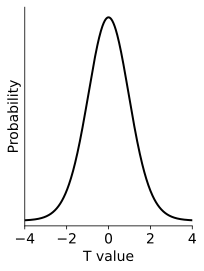

In [4]:
t = np.linspace(-4,4,573)

# a pdf with df=20
tpdf = stats.t.pdf(t,20)

plt.figure(figsize=(3,4))
plt.plot(t,tpdf,'k',linewidth=2)
plt.xlabel('T value')
plt.ylabel('Probability')
plt.yticks([])
plt.ylim([-.01,np.max(tpdf)*1.05])
plt.xlim(t[[0,-1]])

# display the figure
plt.tight_layout()
plt.show()

### Computing p-values for one tailed and two tailed tests

In [5]:
tval = 2.1
df = 13

pval_l = stats.t.cdf(-tval,df)
pval_r = stats.t.sf(tval,df)   #1-stats.t.cdf(tval,df)
pval_2 = pval_l + pval_r

print(f'One-tailed p-value on the left:  {pval_l}')
print(f'One-tailed p-value on the right: {pval_r}')
print(' ')
print(f'Two-tailed p-value as the sum:   {pval_l+pval_r}')
print(f'Two-tailed p-value by doubling:  {2*pval_l}')
     

# 1-cdf vs survival function:
pval_c = 1-stats.t.cdf(tval,df)
pval_s = stats.t.sf(tval,df) # sf = survival function

print(f'P-value from 1-cdf: {pval_c}')
print(f'P-value from s.f.:  {pval_s}')
print(f'Difference:         {pval_c-pval_s}')


One-tailed p-value on the left:  0.027906302135628887
One-tailed p-value on the right: 0.027906302135628887
 
Two-tailed p-value as the sum:   0.055812604271257775
Two-tailed p-value by doubling:  0.055812604271257775
P-value from 1-cdf: 0.027906302135628946
P-value from s.f.:  0.027906302135628887
Difference:         5.898059818321144e-17


### Fig 11.3: T-values from p-values

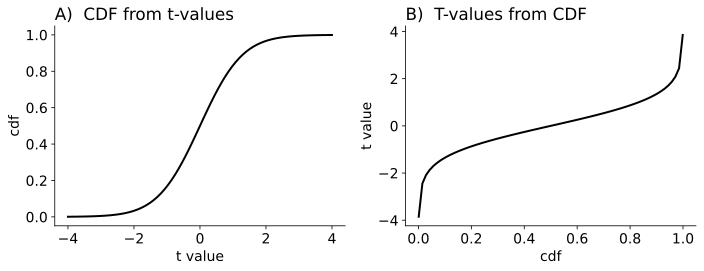

In [6]:
# parameters
t = np.linspace(-4,4,75)
df = 13

# cdf based on t-values
cdf = stats.t.cdf(t,df)

# t-values based on cdf
pvals = np.linspace(.001,.999,73)
tVals = -stats.t.isf(pvals,df) # sf is 1-cdf, and isf is the inverse of the sf. so 1-isf is inv(cdf)

# same as below, but isf has slightly higher accuracy
#tVals = stats.t.ppf(pvals,df) # ppf = Percent point function, this is the inverse of the cdf


# visualize
_,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(t,cdf,'k',linewidth=2)
axs[0].set(xlabel='t value',ylabel='cdf',title=r'A)  CDF from t-values')

axs[1].plot(pvals,tVals,'k',linewidth=2)
axs[1].set(ylabel='t value',xlabel='cdf',title=r'B)  T-values from CDF')

# display the figure
plt.tight_layout()
plt.show()

In [7]:

# example usage to get the t-value associated with p=.25 and df=13
pval = .25
tFromP_L  = -stats.t.isf(  pval,df) # negative of the opposite-cdf for the left tail
tFromP_R1 = -stats.t.isf(1-pval,df) # negative of the opposite-cdf for the right tail
tFromP_R2 =  stats.t.isf(  pval,df) # opposite-cdf for the left tail

print(f'Variable tFromP_L:  {tFromP_L:.3f}')
print(f'Variable tFromP_R1: {tFromP_R1:.3f}')
print(f'Variable tFromP_R2: {tFromP_R2:.3f}')

Variable tFromP_L:  -0.694
Variable tFromP_R1: 0.694
Variable tFromP_R2: 0.694


### Fig 11.4: Example t-value

In [8]:
# empirical t-value and df
tval = 1.6
df   = 20
alpha = .05

In [9]:
# redefine the t-values and corresponding pdf
t = np.linspace(-4,4,573)
tpdf = stats.t.pdf(t,20)


In [10]:
# its associated p-value 
pval = 1-stats.t.cdf(tval,df)

In [11]:
# critical t-value for alpha
t_crit = stats.t.isf(alpha/2,df) # /2 for two-tailed
p_half = np.max(tpdf)/2 # 1/2 max. (vertical) p(t), used for plotting


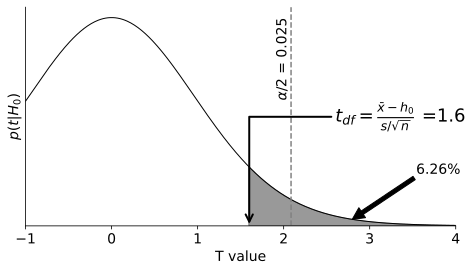

In [12]:
plt.figure(figsize=(7,4))

# plot the t distribution
plt.plot(t,tpdf,'k',linewidth=1,label=r'$t_{20}$-pdf under $H_0$')

# plot the dashed line for the critical t-value
plt.axvline(t_crit,linestyle='--',color='gray')
plt.text(t_crit-.02,p_half*2,r'$\alpha / 2$ = %g'%(alpha/2),rotation=90,va='top',ha='right')

# arrow and formula for the empirical t-value
plt.gca().annotate(r'$t_{df} = \frac{\bar{x}-h_0}{s/\sqrt{n}}$ =%g'%tval,xytext=(tval+1,p_half),
                xy=(tval,0), xycoords='data',size=18,
                arrowprops=dict(arrowstyle='->', color='k',linewidth=2,
                                connectionstyle='angle,angleA=0,angleB=-90,rad=0'))


# shaded area to the right of the empirical t-value
tidx = np.argmin(np.abs(t-tval))
plt.gca().fill_between(t[tidx:],tpdf[tidx:],color='k',alpha=.4)

# and its annotation
tidx = np.argmin(np.abs(t-(tval+t[-1])/2))
plt.gca().annotate(f'{100*pval:.2f}%',xy=(t[tidx],tpdf[tidx]),
            xytext=(t[tidx]+1,p_half/2),ha='center',arrowprops={'color':'k'})


# some final adjustments
plt.xlabel('T value')
plt.ylabel(r'$p(t|H_0)$')
plt.yticks([])
plt.ylim([-.01,np.max(tpdf)*1.05])
plt.xlim([-1,t[-1]])
plt.ylim([0,p_half*2.1])

# display the figure
plt.tight_layout()
plt.show()

### Fig 11.5: completion of previous figure to show both tails

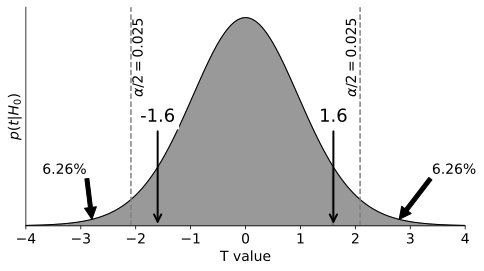

In [13]:
plt.figure(figsize=(7,4))

# t distribution
plt.plot(t, tpdf, 'k', linewidth=1, label=r'$t_{20}$-pdf under $H_0$')

# dashed line for the critical t-value on right side
plt.axvline(t_crit, linestyle='--', color='gray')
plt.text(t_crit-0.02, p_half * 2, r'$\alpha/2 = %g$'%(alpha/2), rotation=90, va='top', ha='right')

# and for the left side
plt.axvline(-t_crit, linestyle='--', color='gray')
plt.text(-t_crit+0.02, p_half * 2, r'$\alpha/2 = %g$'%(alpha/2), rotation=90, va='top', ha='left')

# arrow and formula for the empirical t-value
plt.gca().annotate(r'%g'%tval,xytext=(tval,p_half),
                xy=(tval,0), xycoords='data',size=18,ha='center',bbox=dict(fc='w',edgecolor='none'),
                arrowprops=dict(arrowstyle='->', color='k',linewidth=2))

# repeat on the left
plt.gca().annotate(r'-%g'%tval,xytext=(-tval,p_half),
                xy=(-tval,0), xycoords='data',size=18,ha='center',bbox=dict(fc='w',edgecolor='none'),
                arrowprops=dict(arrowstyle='->', color='k',linewidth=2))

# shaded area to the right of the empirical t-value
tidx = np.argmin(np.abs(t-tval))
plt.gca().fill_between(t[tidx:],tpdf[tidx:],color='k',alpha=.4)
tidx = np.argmin(np.abs(t-tval))
plt.gca().fill_between(t[:tidx],tpdf[:tidx],color='k',alpha=.4)

# and its annotation for the right side
tidx = np.argmin(np.abs(t-(tval+t[-1])/2))
plt.gca().annotate(f'{100*pval:.2f}%',xy=(t[tidx],tpdf[tidx]),xytext=(t[tidx]+1,p_half/2),ha='center',arrowprops={'color':'k'})

# now for the left side
tidx = np.argmin(np.abs(t-(-tval+t[0])/2))
plt.gca().annotate(f'{100*pval:.2f}%',xy=(t[tidx],tpdf[tidx]),xytext=(t[tidx]-.5,p_half/2),ha='center',arrowprops={'color':'k'})


# some final adjustments
plt.xlabel('T value')
plt.ylabel(r'$p(t|H_0)$')
plt.yticks([])
plt.ylim([-.01,np.max(tpdf)*1.05])
plt.xlim(t[[0,-1]])
plt.ylim([0,p_half*2.1])

# display the figure
plt.tight_layout()
plt.show()

### Fig 11.6: Testing for Normality

In [14]:
# data
data1 = np.random.randn(100)
data2 = np.exp(np.random.randn(100))

# omnibus test
o_test1 = stats.normaltest(data1)
o_test2 = stats.normaltest(data2)

# shapiro's test
s_test1 = stats.shapiro(data1)
s_test2 = stats.shapiro(data2)

# results
print(f'Omnibus test in X1 (H0: normal): p={o_test1.pvalue:.3f}')
print(f'Omnibus test in X2 (H0: normal): p={o_test2.pvalue:.3f}')
print(' ')
print(f'Shapiro test in X1 (H0: normal): p={s_test1.pvalue:.3f}')
print(f'Shapiro test in X2 (H0: normal): p={s_test2.pvalue:.3f}')

Omnibus test in X1 (H0: normal): p=0.299
Omnibus test in X2 (H0: normal): p=0.000
 
Shapiro test in X1 (H0: normal): p=0.157
Shapiro test in X2 (H0: normal): p=0.000


In [15]:
# histograms
yy1, xx1 = np.histogram(data1,bins='fd')
xx1 = (xx1[1:]+xx1[:-1])/2

yy2, xx2 = np.histogram(data2,bins='fd')
xx2 = (xx2[1:]+xx2[:-1])/2

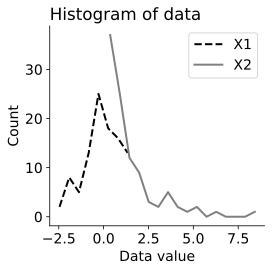

In [16]:
# plots
plt.figure(figsize=(4,4))
plt.plot(xx1, yy1, 'k--', linewidth=2, label='X1')
plt.plot(xx2, yy2, 'gray', linewidth=2, label='X2')
plt.gca().set(xlabel='Data value',ylabel='Count',title='Histogram of data')
plt.legend()

# display the figure
plt.tight_layout()
plt.show()

### Fig 11.7: increasing the t-value

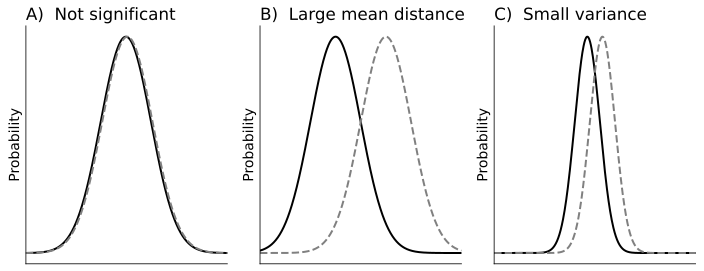

In [17]:
x = np.linspace(-4, 4, 501)

_, axs = plt.subplots(1, 3, figsize=(10, 4))

# panel A: probability not significant
g1 = stats.norm.pdf(x, loc=-0.03, scale=1)
g2 = stats.norm.pdf(x, loc=0.03, scale=1)

axs[0].plot(x, g1, 'k', linewidth=2)
axs[0].plot(x, g2, '--', color=(0.5,0.5,0.5), linewidth=2)
axs[0].set(xticks=[], xlim=x[[0, -1]], yticks=[], ylabel='Probability', 
           title='A)  Not significant')

# panel B: probability significant by larger mean distance
g1 = stats.norm.pdf(x, loc=-1, scale=1)
g2 = stats.norm.pdf(x, loc=1, scale=1)

axs[1].plot(x, g1, 'k', linewidth=2)
axs[1].plot(x, g2, '--', color=(0.5,0.5,0.5), linewidth=2)
axs[1].set(xticks=[], xlim=x[[0, -1]], yticks=[], ylabel='Probability', 
           title='B)  Large mean distance')

# panel C: probability significant by smaller variance
g1 = stats.norm.pdf(x, loc=-0.3, scale=0.5)
g2 = stats.norm.pdf(x, loc=0.3, scale=0.5)

axs[2].plot(x, g1, 'k', linewidth=2)
axs[2].plot(x, g2, '--', color=(0.5,0.5,0.5), linewidth=2)
axs[2].set(xticks=[], xlim=x[[0, -1]], yticks=[], ylabel='Probability', 
           title='C)  Small variance')

# display the figure
plt.tight_layout()
plt.show()

### One sample t test

In [18]:
# data
x = np.array([80, 85, 90, 70, 75, 72, 88, 77, 82, 65, 79, 81, 74, 86, 68])
h0 = 75

# descriptive stats
mean_x = np.mean(x)
std_x = np.std(x, ddof=1)
n = len(x)

# t-test
tval = (mean_x - h0) / (std_x / np.sqrt(n))

# p-value
pval = 1 - stats.t.cdf(tval, n-1)
pval *= 2 # two-tailed

# display results
print(f'Mean: {mean_x:.2f}')
print(f'Standard deviation: {std_x:.2f}')
print(f'Sample size: {n}')
print(' ')
print(f'T-value: {tval:.2f}')
print(f'P-value: {pval:.3f}')

Mean: 78.13
Standard deviation: 7.47
Sample size: 15
 
T-value: 1.62
P-value: 0.127


In [19]:
# using stats library
ttest = stats.ttest_1samp(x, h0)

# check type of output
print(type(ttest))

<class 'scipy.stats._stats_py.TtestResult'>


In [20]:
# print elements of the output
print(f'T-value: {ttest.statistic:.2f}')
print(f'P-value: {ttest.pvalue:.3f}')
print(f'Degrees of freedom: {ttest.df}')

T-value: 1.62
P-value: 0.127
Degrees of freedom: 14


### fig 11.8: Paired samples t test

In [21]:
# data
x_n = np.array([60, 52, 90, 20, 33, 95, 18, 47, 78, 65])
x_q = np.array([65, 60, 84, 23, 37, 95, 17, 53, 88, 66])
size = len(x_n)

# difference
delta = x_q - x_n


/tmp/ipykernel_16362/3137336908.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set(ylabel='Difference', xlim=[-0.1, 0.1], xticklabels=[r'$\Delta$'],


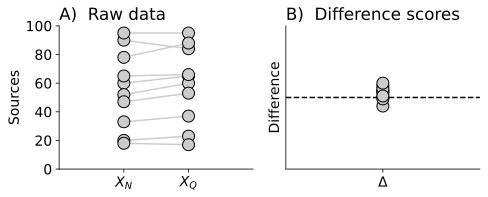

In [22]:
# plot
_, axs = plt.subplots(1, 2, figsize=(7,3))

# drawing individual lines
for i, j in zip(x_n, x_q):
    axs[0].plot([0, 1], [i, j], 'o-', color=(0.8, 0.8, 0.8), 
                markersize=12, markerfacecolor=(0.8, 0.8, 0.8), markeredgecolor='k')
    
# plot adjustments
axs[0].set(ylabel='Sources', xlim=[-1, 2], ylim=[0, 100], 
           xticks=[0, 1], xticklabels=[r'$X_N$', r'$X_Q$'],  
           title='A)  Raw data')

# drawing the difference scores
axs[1].plot(np.zeros(size), delta, 'ko', markersize=12, markerfacecolor=(0.8, 0.8, 0.8))
axs[1].plot([-0.1, 0.1], [0, 0], 'k--', zorder=-1)
axs[1].set(ylabel='Difference', xlim=[-0.1, 0.1], xticklabels=[r'$\Delta$'],  
           ylim=[-50, 50], xticks=[0], yticks=[], title='B)  Difference scores')

# display the figure
plt.tight_layout()
plt.show()

### Fig 11.9: Example of two sample t test

In [23]:
# data
data1 = stats.exponnorm.rvs(3,size=50)
data2 = stats.gumbel_r.rvs(size=42)

# their histograms
yy1,xx1 = np.histogram(data1,bins='fd')
xx1 = (xx1[1:]+xx1[:-1])/2
yy2,xx2 = np.histogram(data2,bins='fd')
xx2 = (xx2[1:]+xx2[:-1])/2

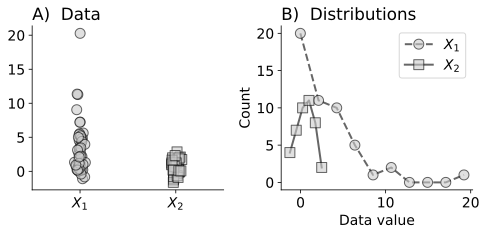

In [24]:
# plotting
_,axs = plt.subplots(1,2,figsize=(7,3.5))

# raw data
axs[0].plot(np.random.randn(len(data1))/40,data1,
            'ko',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[0].plot(np.random.randn(len(data2))/40+1,data2,
            'ks',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[0].set(xlim=[-.5,1.5],xticks=[0,1],xticklabels=[r'$X_1$',r'$X_2$'],
           title=r'A)  Data')


# histograms
axs[1].plot(xx1,yy1,'ko--',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6,linewidth=2,label=r'$X_1$')
axs[1].plot(xx2,yy2,'ks-',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6,linewidth=2,label=r'$X_2$')
axs[1].set(xlabel='Data value',ylabel='Count',title=r'B)  Distributions')
axs[1].legend()

# display the figure
plt.tight_layout()
plt.show()

In [25]:
# doubling rubric
s1 = np.std(data1,ddof=1)
s2 = np.std(data2,ddof=1)

# report
print(f'Standard deviations: {s1:.2f} and {s2:.2f}')
print(f'Ratio of max:min stdevs is {np.max([s1,s2])/np.min([s1,s2]):.2f}')

# Levene's test
lres = stats.levene(data1,data2)
print('')
print(f"Levene's test for homogeneity of variance: W={lres.statistic:.2f}, p={lres.pvalue:.3f}")

Standard deviations: 3.82 and 1.06
Ratio of max:min stdevs is 3.60

Levene's test for homogeneity of variance: W=12.24, p=0.001


In [28]:
# tests for normal distribution

# omnibus test
o_test1 = stats.normaltest(data1)
o_test2 = stats.normaltest(data2)

print(f'Omnibus test in X1 (H0=normal): p={o_test1.pvalue:.3f}')
print(f'Omnibus test in X2 (H0=normal): p={o_test2.pvalue:.3f}')
print('')


# Shapiro's test
s_test1 = stats.shapiro(data1)
s_test2 = stats.shapiro(data2)

print(f'Shapiro test in X1 (H0=normal): p={s_test1.pvalue:.3f}')
print(f'Shapiro test in X2 (H0=normal): p={s_test2.pvalue:.3f}')

Omnibus test in X1 (H0=normal): p=0.000
Omnibus test in X2 (H0=normal): p=0.592

Shapiro test in X1 (H0=normal): p=0.000
Shapiro test in X2 (H0=normal): p=0.849


In [29]:
# the t-test
tres = stats.ttest_ind(data1,data2,equal_var=False)
print(f't={tres.statistic:.2f}, p={tres.pvalue:.3f}')

t=4.44, p=0.000


### Fig 11.10: Wilcoxen signed rank

In [30]:
# data
data = np.random.randn(100)** 2
h0 = 1

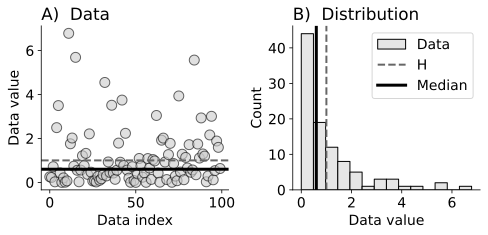

In [31]:
# show the data!
_,axs = plt.subplots(1,2,figsize=(7,3.5))

# raw data
axs[0].plot(data,'ko',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[0].axhline(h0,linestyle='--',color=(.4,.4,.4),linewidth=2)
axs[0].axhline(np.median(data),color='k',linewidth=3)
axs[0].set(xlabel='Data index',ylabel='Data value',title=r'A)  Data')

# histogram
axs[1].hist(data,bins='fd',facecolor=(.9,.9,.9),edgecolor='k',label='Data')
axs[1].axvline(h0,linestyle='--',color=(.4,.4,.4),linewidth=2,label=r'H')
axs[1].axvline(np.median(data),color='k',linewidth=3,label='Median')
axs[1].set(xlabel='Data value',ylabel='Count',title=r'B)  Distribution')
axs[1].legend()

# display the figure
plt.tight_layout()
plt.show()

In [32]:
# the test
wtest = stats.wilcoxon(data-h0, method='approx')

# report
print(f'z={wtest.zstatistic:.2f}, p={wtest.pvalue:.3f}')

z=-1.36, p=0.173


### Fig 11.11: sign of z in wolcoxon test

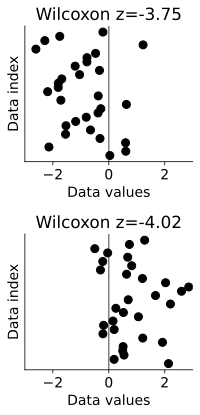

In [33]:
_,axs = plt.subplots(2,1,figsize=(3,6))

for i in range(2):

  # create and shift data
  d = np.random.randn(30)
  d += i*2-1

  # Wilcoxon z-score
  z = stats.wilcoxon(d,method='approx',alternative='two-sided').zstatistic

  # draw the figure
  axs[i].plot(d,range(len(d)),'ko',markersize=8)
  axs[i].axvline(0,zorder=-1,color='gray')
  axs[i].set(xlabel='Data values',ylabel='Data index',yticks=[],xlim=[-3,3])
  axs[i].set_title(f'Wilcoxon z={z:.2f}',loc='center')

# display the figure
plt.tight_layout()
plt.show()

### Mann-whitney U test

In [34]:
# same data as for the independent-samples t-test
data1 = stats.exponnorm.rvs(3,size=50)
data2 = stats.gumbel_r.rvs(size=42)

# MW-U test
mwu = stats.mannwhitneyu(data1,data2)
print(f'U = {mwu.statistic:.0f}, p = {mwu.pvalue:.3f}')


# parametric t-test (gives the same statistical conclusion as the MWU)
tres = stats.ttest_ind(data1,data2,equal_var=False)
print(f't = {tres.statistic:.2f}, p = {tres.pvalue:.3f}')

U = 1530, p = 0.000
t = 4.57, p = 0.000
